In [15]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Eigenenergies

In [16]:
# Paramaters:

# Truncate hilbert space to N levels
N = 2
wr = 1.0
wtls = 1.0
g = 0.05  

# Coupling regimes: >> decay rates 

# density matrix evolution

In [17]:
# Operators
a = destroy(N)
adag = create(N)
sz = sigmaz()
sigmap = sigmap()
sigmam = sigmam()

In [18]:
# Hamiltonians
H_RES = wr * tensor(adag * a, identity(2))
H_TLS = wtls / 2 * tensor(identity(N), sz)

H_Uncoupled = H_RES + H_TLS

In [19]:
# Coupling (Interaction) hamiltonians

# H_intRWA: Jaynes-Cummings Interaction (Co-rotating terms only)
H_intRWA = g * (tensor(adag, sigmam) + tensor(a, sigmap))

# H_int: Full Quantum Rabi Interaction (Includes Counter-Rotating Terms)
H_int = g * (tensor(adag, sigmam) + tensor(a, sigmap) + tensor(adag, sigmap) + tensor(a, sigmam))

In [20]:
# Total Hamiltonians
H_JC = H_Uncoupled + H_intRWA  # Jaynes-Cummings
H_FULL = H_Uncoupled + H_int   # Quantum Rabi

In [21]:
# Evolution of state
psi0 = tensor(basis(N, 0), basis(2, 1))
tlist = np.linspace(0, 50, 500)

# Photon number operator: n_cav = a.dag() * a (in combined space)
n_photons = tensor(adag * a, identity(2))
# TLS Excitation operator: n_atom = sigma_p * sigma_m (in combined space)
n_tls = tensor(identity(N), sigmap * sigmam)

In [22]:
# Let us plot the eigenvalues of the two Hamiltonians to see the difference
eigen_JC = H_JC.eigenenergies()
eigen_Full = H_FULL.eigenenergies()

In [23]:
import matplotlib.animation as animation
import html
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(8, 6))
line1, = ax.plot([], [], 'bo', label='Jaynes-Cummings with RWA')
line2, = ax.plot([], [], 'ro', label='Without RWA')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 10)
ax.set_xlabel('Coupling Strength g')
ax.set_ylabel('Eigenenergies')
ax.set_title('Eigenenergies vs Coupling Strength')
ax.legend()
def update(g):
    H_intRWA = g * (tensor(adag, sigmam) + tensor(a, sigmap))
    H_int = g * (tensor(adag, sigmam) + tensor(a, sigmap) + tensor(adag, sigmap) + tensor(a, sigmam))
    H_JC = H_Uncoupled + H_intRWA
    H_FULL = H_Uncoupled + H_int
    eigen_JC = H_JC.eigenenergies()
    eigen_Full = H_FULL.eigenenergies()
    line1.set_data([g]*len(eigen_JC), eigen_JC)
    line2.set_data([g]*len(eigen_Full), eigen_Full)
    return line1, line2
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 0.5, 100), blit=True)

# 1. Create the HTML object
html_output = ani.to_jshtml()

# 2. **Explicitly close the Matplotlib figure** to prevent its static rendering
plt.close(fig)

# 3. **Display the HTML object (the animation)** as the final, unsuppressed output
HTML(html_output)

c:\Users\aadik\CSE\Quantum_Sensing_and_Measurement\venv\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


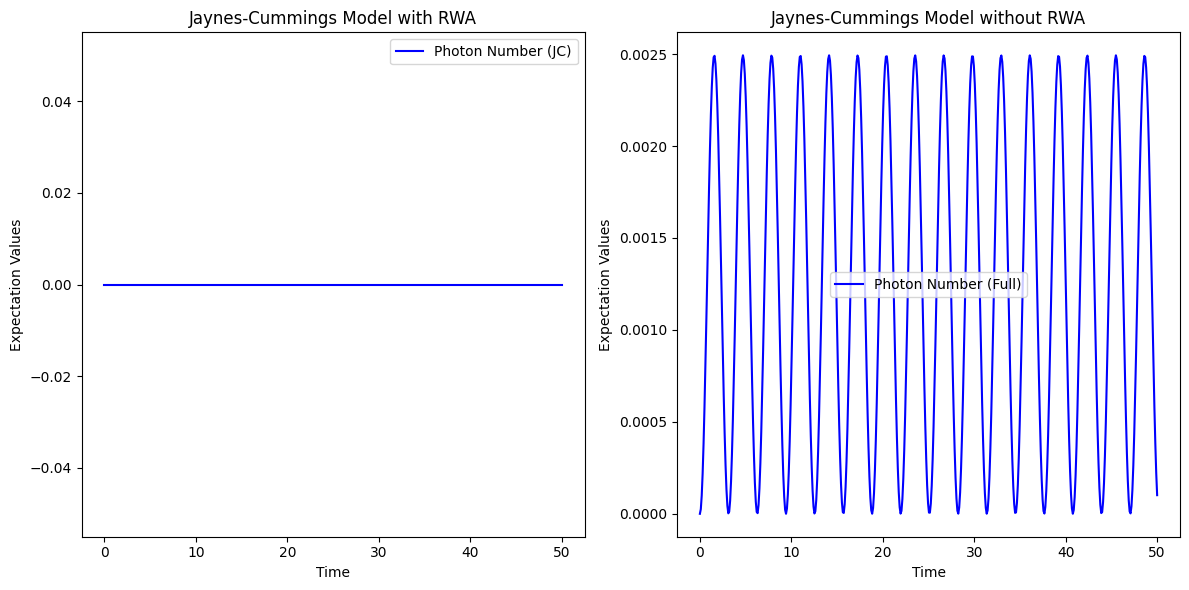

In [24]:
# Let us plot how the photon number and TLS excitation evolve over time for both Hamiltonians
result_JC = mesolve(H_JC, psi0, tlist, [], [n_photons, n_tls])
result_Full = mesolve(H_FULL, psi0, tlist, [], [n_photons, n_tls])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tlist, result_JC.expect[0], 'b', label='Photon Number (JC)')
# plt.plot(tlist, result_JC.expect[1], 'r', label='TLS Excitation (JC)')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title('Jaynes-Cummings Model with RWA')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(tlist, result_Full.expect[0], 'b', label='Photon Number (Full)')
# plt.plot(tlist, result_Full.expect[1], 'r', label='TLS Excitation (Full)')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title('Jaynes-Cummings Model without RWA')
plt.legend()
plt.tight_layout()
plt.show()